<a href="https://colab.research.google.com/github/YazdocApp/CAPSTONE2.0/blob/main/age_detection_after_call_git_hub_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/YazdocApp/aesthetic-procedure-recommender.git
%cd aesthetic-procedure-recommender

Cloning into 'aesthetic-procedure-recommender'...
remote: Enumerating objects: 68, done.
remote: Total 68 (delta 0), reused 0 (delta 0), pack-reused 68 (from 1)
Receiving objects: 100% (68/68), 58.92 MiB | 48.00 MiB/s, done.
Resolving deltas: 100% (20/20), done.
/content/aesthetic-procedure-recommender


In [3]:
!pip install scikit-learn

In [4]:
from google.colab import files

uploaded = files.upload()
img_name = list(uploaded.keys())[0]
print("✅ Uploaded image:", img_name)

Saving Screenshot 2025-06-18 at 5.48.20 pm.png to Screenshot 2025-06-18 at 5.48.20 pm.png
✅ Uploaded image: Screenshot 2025-06-18 at 5.48.20 pm.png


In [5]:
import torch
from model import MultiTaskCNN  # Replace or paste model definition if needed

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)
model.load_state_dict(torch.load('multitask_cnn.pth', map_location=device))
model.eval()
print("✅ Model loaded and ready.")

ModuleNotFoundError: No module named 'model'

In [6]:
import torch
import torch.nn as nn
import torchvision.models as models

# Multi-task CNN definition
class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )



In [8]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Device:", device)

✅ Device: cuda


In [9]:
from PIL import Image
import torchvision.transforms as transforms

input_image = Image.open(img_name).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_tensor = transform(input_image).unsqueeze(0).to(device)

with torch.no_grad():
    age_pred, _, _ = model(input_tensor)

predicted_age = age_pred.item()
print(f"🚀 Predicted Age: {predicted_age:.1f} years")

NameError: name 'model' is not defined

In [10]:
from PIL import Image
import torchvision.transforms as transforms

input_image = Image.open(img_name).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_tensor = transform(input_image).unsqueeze(0).to(device)

with torch.no_grad():
    age_pred, _, _ = model(input_tensor)

predicted_age = age_pred.item()
print(f"🚀 Predicted Age: {predicted_age:.1f} years")

NameError: name 'model' is not defined

In [12]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(2048, 512, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 1, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)
model.load_state_dict(torch.load('multitask_cnn.pth', map_location=device))
model.eval()

print("✅ Model defined, weights loaded, and ready!")

RuntimeError: Error(s) in loading state_dict for MultiTaskCNN:
	Missing key(s) in state_dict: "features.0.weight", "features.1.weight", "features.1.bias", "features.1.running_mean", "features.1.running_var", "features.4.0.conv1.weight", "features.4.0.bn1.weight", "features.4.0.bn1.bias", "features.4.0.bn1.running_mean", "features.4.0.bn1.running_var", "features.4.0.conv2.weight", "features.4.0.bn2.weight", "features.4.0.bn2.bias", "features.4.0.bn2.running_mean", "features.4.0.bn2.running_var", "features.4.0.conv3.weight", "features.4.0.bn3.weight", "features.4.0.bn3.bias", "features.4.0.bn3.running_mean", "features.4.0.bn3.running_var", "features.4.0.downsample.0.weight", "features.4.0.downsample.1.weight", "features.4.0.downsample.1.bias", "features.4.0.downsample.1.running_mean", "features.4.0.downsample.1.running_var", "features.4.1.conv1.weight", "features.4.1.bn1.weight", "features.4.1.bn1.bias", "features.4.1.bn1.running_mean", "features.4.1.bn1.running_var", "features.4.1.conv2.weight", "features.4.1.bn2.weight", "features.4.1.bn2.bias", "features.4.1.bn2.running_mean", "features.4.1.bn2.running_var", "features.4.1.conv3.weight", "features.4.1.bn3.weight", "features.4.1.bn3.bias", "features.4.1.bn3.running_mean", "features.4.1.bn3.running_var", "features.4.2.conv1.weight", "features.4.2.bn1.weight", "features.4.2.bn1.bias", "features.4.2.bn1.running_mean", "features.4.2.bn1.running_var", "features.4.2.conv2.weight", "features.4.2.bn2.weight", "features.4.2.bn2.bias", "features.4.2.bn2.running_mean", "features.4.2.bn2.running_var", "features.4.2.conv3.weight", "features.4.2.bn3.weight", "features.4.2.bn3.bias", "features.4.2.bn3.running_mean", "features.4.2.bn3.running_var", "features.5.0.conv1.weight", "features.5.0.bn1.weight", "features.5.0.bn1.bias", "features.5.0.bn1.running_mean", "features.5.0.bn1.running_var", "features.5.0.conv2.weight", "features.5.0.bn2.weight", "features.5.0.bn2.bias", "features.5.0.bn2.running_mean", "features.5.0.bn2.running_var", "features.5.0.conv3.weight", "features.5.0.bn3.weight", "features.5.0.bn3.bias", "features.5.0.bn3.running_mean", "features.5.0.bn3.running_var", "features.5.0.downsample.0.weight", "features.5.0.downsample.1.weight", "features.5.0.downsample.1.bias", "features.5.0.downsample.1.running_mean", "features.5.0.downsample.1.running_var", "features.5.1.conv1.weight", "features.5.1.bn1.weight", "features.5.1.bn1.bias", "features.5.1.bn1.running_mean", "features.5.1.bn1.running_var", "features.5.1.conv2.weight", "features.5.1.bn2.weight", "features.5.1.bn2.bias", "features.5.1.bn2.running_mean", "features.5.1.bn2.running_var", "features.5.1.conv3.weight", "features.5.1.bn3.weight", "features.5.1.bn3.bias", "features.5.1.bn3.running_mean", "features.5.1.bn3.running_var", "features.5.2.conv1.weight", "features.5.2.bn1.weight", "features.5.2.bn1.bias", "features.5.2.bn1.running_mean", "features.5.2.bn1.running_var", "features.5.2.conv2.weight", "features.5.2.bn2.weight", "features.5.2.bn2.bias", "features.5.2.bn2.running_mean", "features.5.2.bn2.running_var", "features.5.2.conv3.weight", "features.5.2.bn3.weight", "features.5.2.bn3.bias", "features.5.2.bn3.running_mean", "features.5.2.bn3.running_var", "features.5.3.conv1.weight", "features.5.3.bn1.weight", "features.5.3.bn1.bias", "features.5.3.bn1.running_mean", "features.5.3.bn1.running_var", "features.5.3.conv2.weight", "features.5.3.bn2.weight", "features.5.3.bn2.bias", "features.5.3.bn2.running_mean", "features.5.3.bn2.running_var", "features.5.3.conv3.weight", "features.5.3.bn3.weight", "features.5.3.bn3.bias", "features.5.3.bn3.running_mean", "features.5.3.bn3.running_var", "features.6.0.conv1.weight", "features.6.0.bn1.weight", "features.6.0.bn1.bias", "features.6.0.bn1.running_mean", "features.6.0.bn1.running_var", "features.6.0.conv2.weight", "features.6.0.bn2.weight", "features.6.0.bn2.bias", "features.6.0.bn2.running_mean", "features.6.0.bn2.running_var", "features.6.0.conv3.weight", "features.6.0.bn3.weight", "features.6.0.bn3.bias", "features.6.0.bn3.running_mean", "features.6.0.bn3.running_var", "features.6.0.downsample.0.weight", "features.6.0.downsample.1.weight", "features.6.0.downsample.1.bias", "features.6.0.downsample.1.running_mean", "features.6.0.downsample.1.running_var", "features.6.1.conv1.weight", "features.6.1.bn1.weight", "features.6.1.bn1.bias", "features.6.1.bn1.running_mean", "features.6.1.bn1.running_var", "features.6.1.conv2.weight", "features.6.1.bn2.weight", "features.6.1.bn2.bias", "features.6.1.bn2.running_mean", "features.6.1.bn2.running_var", "features.6.1.conv3.weight", "features.6.1.bn3.weight", "features.6.1.bn3.bias", "features.6.1.bn3.running_mean", "features.6.1.bn3.running_var", "features.6.2.conv1.weight", "features.6.2.bn1.weight", "features.6.2.bn1.bias", "features.6.2.bn1.running_mean", "features.6.2.bn1.running_var", "features.6.2.conv2.weight", "features.6.2.bn2.weight", "features.6.2.bn2.bias", "features.6.2.bn2.running_mean", "features.6.2.bn2.running_var", "features.6.2.conv3.weight", "features.6.2.bn3.weight", "features.6.2.bn3.bias", "features.6.2.bn3.running_mean", "features.6.2.bn3.running_var", "features.6.3.conv1.weight", "features.6.3.bn1.weight", "features.6.3.bn1.bias", "features.6.3.bn1.running_mean", "features.6.3.bn1.running_var", "features.6.3.conv2.weight", "features.6.3.bn2.weight", "features.6.3.bn2.bias", "features.6.3.bn2.running_mean", "features.6.3.bn2.running_var", "features.6.3.conv3.weight", "features.6.3.bn3.weight", "features.6.3.bn3.bias", "features.6.3.bn3.running_mean", "features.6.3.bn3.running_var", "features.6.4.conv1.weight", "features.6.4.bn1.weight", "features.6.4.bn1.bias", "features.6.4.bn1.running_mean", "features.6.4.bn1.running_var", "features.6.4.conv2.weight", "features.6.4.bn2.weight", "features.6.4.bn2.bias", "features.6.4.bn2.running_mean", "features.6.4.bn2.running_var", "features.6.4.conv3.weight", "features.6.4.bn3.weight", "features.6.4.bn3.bias", "features.6.4.bn3.running_mean", "features.6.4.bn3.running_var", "features.6.5.conv1.weight", "features.6.5.bn1.weight", "features.6.5.bn1.bias", "features.6.5.bn1.running_mean", "features.6.5.bn1.running_var", "features.6.5.conv2.weight", "features.6.5.bn2.weight", "features.6.5.bn2.bias", "features.6.5.bn2.running_mean", "features.6.5.bn2.running_var", "features.6.5.conv3.weight", "features.6.5.bn3.weight", "features.6.5.bn3.bias", "features.6.5.bn3.running_mean", "features.6.5.bn3.running_var", "features.7.0.conv1.weight", "features.7.0.bn1.weight", "features.7.0.bn1.bias", "features.7.0.bn1.running_mean", "features.7.0.bn1.running_var", "features.7.0.conv2.weight", "features.7.0.bn2.weight", "features.7.0.bn2.bias", "features.7.0.bn2.running_mean", "features.7.0.bn2.running_var", "features.7.0.conv3.weight", "features.7.0.bn3.weight", "features.7.0.bn3.bias", "features.7.0.bn3.running_mean", "features.7.0.bn3.running_var", "features.7.0.downsample.0.weight", "features.7.0.downsample.1.weight", "features.7.0.downsample.1.bias", "features.7.0.downsample.1.running_mean", "features.7.0.downsample.1.running_var", "features.7.1.conv1.weight", "features.7.1.bn1.weight", "features.7.1.bn1.bias", "features.7.1.bn1.running_mean", "features.7.1.bn1.running_var", "features.7.1.conv2.weight", "features.7.1.bn2.weight", "features.7.1.bn2.bias", "features.7.1.bn2.running_mean", "features.7.1.bn2.running_var", "features.7.1.conv3.weight", "features.7.1.bn3.weight", "features.7.1.bn3.bias", "features.7.1.bn3.running_mean", "features.7.1.bn3.running_var", "features.7.2.conv1.weight", "features.7.2.bn1.weight", "features.7.2.bn1.bias", "features.7.2.bn1.running_mean", "features.7.2.bn1.running_var", "features.7.2.conv2.weight", "features.7.2.bn2.weight", "features.7.2.bn2.bias", "features.7.2.bn2.running_mean", "features.7.2.bn2.running_var", "features.7.2.conv3.weight", "features.7.2.bn3.weight", "features.7.2.bn3.bias", "features.7.2.bn3.running_mean", "features.7.2.bn3.running_var", "segmentation_head.8.weight", "segmentation_head.8.bias". 
	Unexpected key(s) in state_dict: "features.8.0.weight", "features.8.1.weight", "features.8.1.bias", "features.8.1.running_mean", "features.8.1.running_var", "features.8.1.num_batches_tracked", "features.0.0.weight", "features.0.1.weight", "features.0.1.bias", "features.0.1.running_mean", "features.0.1.running_var", "features.0.1.num_batches_tracked", "features.1.0.block.0.0.weight", "features.1.0.block.0.1.weight", "features.1.0.block.0.1.bias", "features.1.0.block.0.1.running_mean", "features.1.0.block.0.1.running_var", "features.1.0.block.0.1.num_batches_tracked", "features.1.0.block.1.fc1.weight", "features.1.0.block.1.fc1.bias", "features.1.0.block.1.fc2.weight", "features.1.0.block.1.fc2.bias", "features.1.0.block.2.0.weight", "features.1.0.block.2.1.weight", "features.1.0.block.2.1.bias", "features.1.0.block.2.1.running_mean", "features.1.0.block.2.1.running_var", "features.1.0.block.2.1.num_batches_tracked", "features.1.1.block.0.0.weight", "features.1.1.block.0.1.weight", "features.1.1.block.0.1.bias", "features.1.1.block.0.1.running_mean", "features.1.1.block.0.1.running_var", "features.1.1.block.0.1.num_batches_tracked", "features.1.1.block.1.fc1.weight", "features.1.1.block.1.fc1.bias", "features.1.1.block.1.fc2.weight", "features.1.1.block.1.fc2.bias", "features.1.1.block.2.0.weight", "features.1.1.block.2.1.weight", "features.1.1.block.2.1.bias", "features.1.1.block.2.1.running_mean", "features.1.1.block.2.1.running_var", "features.1.1.block.2.1.num_batches_tracked", "features.2.0.block.0.0.weight", "features.2.0.block.0.1.weight", "features.2.0.block.0.1.bias", "features.2.0.block.0.1.running_mean", "features.2.0.block.0.1.running_var", "features.2.0.block.0.1.num_batches_tracked", "features.2.0.block.1.0.weight", "features.2.0.block.1.1.weight", "features.2.0.block.1.1.bias", "features.2.0.block.1.1.running_mean", "features.2.0.block.1.1.running_var", "features.2.0.block.1.1.num_batches_tracked", "features.2.0.block.2.fc1.weight", "features.2.0.block.2.fc1.bias", "features.2.0.block.2.fc2.weight", "features.2.0.block.2.fc2.bias", "features.2.0.block.3.0.weight", "features.2.0.block.3.1.weight", "features.2.0.block.3.1.bias", "features.2.0.block.3.1.running_mean", "features.2.0.block.3.1.running_var", "features.2.0.block.3.1.num_batches_tracked", "features.2.1.block.0.0.weight", "features.2.1.block.0.1.weight", "features.2.1.block.0.1.bias", "features.2.1.block.0.1.running_mean", "features.2.1.block.0.1.running_var", "features.2.1.block.0.1.num_batches_tracked", "features.2.1.block.1.0.weight", "features.2.1.block.1.1.weight", "features.2.1.block.1.1.bias", "features.2.1.block.1.1.running_mean", "features.2.1.block.1.1.running_var", "features.2.1.block.1.1.num_batches_tracked", "features.2.1.block.2.fc1.weight", "features.2.1.block.2.fc1.bias", "features.2.1.block.2.fc2.weight", "features.2.1.block.2.fc2.bias", "features.2.1.block.3.0.weight", "features.2.1.block.3.1.weight", "features.2.1.block.3.1.bias", "features.2.1.block.3.1.running_mean", "features.2.1.block.3.1.running_var", "features.2.1.block.3.1.num_batches_tracked", "features.2.2.block.0.0.weight", "features.2.2.block.0.1.weight", "features.2.2.block.0.1.bias", "features.2.2.block.0.1.running_mean", "features.2.2.block.0.1.running_var", "features.2.2.block.0.1.num_batches_tracked", "features.2.2.block.1.0.weight", "features.2.2.block.1.1.weight", "features.2.2.block.1.1.bias", "features.2.2.block.1.1.running_mean", "features.2.2.block.1.1.running_var", "features.2.2.block.1.1.num_batches_tracked", "features.2.2.block.2.fc1.weight", "features.2.2.block.2.fc1.bias", "features.2.2.block.2.fc2.weight", "features.2.2.block.2.fc2.bias", "features.2.2.block.3.0.weight", "features.2.2.block.3.1.weight", "features.2.2.block.3.1.bias", "features.2.2.block.3.1.running_mean", "features.2.2.block.3.1.running_var", "features.2.2.block.3.1.num_batches_tracked", "features.3.0.block.0.0.weight", "features.3.0.block.0.1.weight", "features.3.0.block.0.1.bias", "features.3.0.block.0.1.running_mean", "features.3.0.block.0.1.running_var", "features.3.0.block.0.1.num_batches_tracked", "features.3.0.block.1.0.weight", "features.3.0.block.1.1.weight", "features.3.0.block.1.1.bias", "features.3.0.block.1.1.running_mean", "features.3.0.block.1.1.running_var", "features.3.0.block.1.1.num_batches_tracked", "features.3.0.block.2.fc1.weight", "features.3.0.block.2.fc1.bias", "features.3.0.block.2.fc2.weight", "features.3.0.block.2.fc2.bias", "features.3.0.block.3.0.weight", "features.3.0.block.3.1.weight", "features.3.0.block.3.1.bias", "features.3.0.block.3.1.running_mean", "features.3.0.block.3.1.running_var", "features.3.0.block.3.1.num_batches_tracked", "features.3.1.block.0.0.weight", "features.3.1.block.0.1.weight", "features.3.1.block.0.1.bias", "features.3.1.block.0.1.running_mean", "features.3.1.block.0.1.running_var", "features.3.1.block.0.1.num_batches_tracked", "features.3.1.block.1.0.weight", "features.3.1.block.1.1.weight", "features.3.1.block.1.1.bias", "features.3.1.block.1.1.running_mean", "features.3.1.block.1.1.running_var", "features.3.1.block.1.1.num_batches_tracked", "features.3.1.block.2.fc1.weight", "features.3.1.block.2.fc1.bias", "features.3.1.block.2.fc2.weight", "features.3.1.block.2.fc2.bias", "features.3.1.block.3.0.weight", "features.3.1.block.3.1.weight", "features.3.1.block.3.1.bias", "features.3.1.block.3.1.running_mean", "features.3.1.block.3.1.running_var", "features.3.1.block.3.1.num_batches_tracked", "features.3.2.block.0.0.weight", "features.3.2.block.0.1.weight", "features.3.2.block.0.1.bias", "features.3.2.block.0.1.running_mean", "features.3.2.block.0.1.running_var", "features.3.2.block.0.1.num_batches_tracked", "features.3.2.block.1.0.weight", "features.3.2.block.1.1.weight", "features.3.2.block.1.1.bias", "features.3.2.block.1.1.running_mean", "features.3.2.block.1.1.running_var", "features.3.2.block.1.1.num_batches_tracked", "features.3.2.block.2.fc1.weight", "features.3.2.block.2.fc1.bias", "features.3.2.block.2.fc2.weight", "features.3.2.block.2.fc2.bias", "features.3.2.block.3.0.weight", "features.3.2.block.3.1.weight", "features.3.2.block.3.1.bias", "features.3.2.block.3.1.running_mean", "features.3.2.block.3.1.running_var", "features.3.2.block.3.1.num_batches_tracked", "features.4.3.block.0.0.weight", "features.4.3.block.0.1.weight", "features.4.3.block.0.1.bias", "features.4.3.block.0.1.running_mean", "features.4.3.block.0.1.running_var", "features.4.3.block.0.1.num_batches_tracked", "features.4.3.block.1.0.weight", "features.4.3.block.1.1.weight", "features.4.3.block.1.1.bias", "features.4.3.block.1.1.running_mean", "features.4.3.block.1.1.running_var", "features.4.3.block.1.1.num_batches_tracked", "features.4.3.block.2.fc1.weight", "features.4.3.block.2.fc1.bias", "features.4.3.block.2.fc2.weight", "features.4.3.block.2.fc2.bias", "features.4.3.block.3.0.weight", "features.4.3.block.3.1.weight", "features.4.3.block.3.1.bias", "features.4.3.block.3.1.running_mean", "features.4.3.block.3.1.running_var", "features.4.3.block.3.1.num_batches_tracked", "features.4.4.block.0.0.weight", "features.4.4.block.0.1.weight", "features.4.4.block.0.1.bias", "features.4.4.block.0.1.running_mean", "features.4.4.block.0.1.running_var", "features.4.4.block.0.1.num_batches_tracked", "features.4.4.block.1.0.weight", "features.4.4.block.1.1.weight", "features.4.4.block.1.1.bias", "features.4.4.block.1.1.running_mean", "features.4.4.block.1.1.running_var", "features.4.4.block.1.1.num_batches_tracked", "features.4.4.block.2.fc1.weight", "features.4.4.block.2.fc1.bias", "features.4.4.block.2.fc2.weight", "features.4.4.block.2.fc2.bias", "features.4.4.block.3.0.weight", "features.4.4.block.3.1.weight", "features.4.4.block.3.1.bias", "features.4.4.block.3.1.running_mean", "features.4.4.block.3.1.running_var", "features.4.4.block.3.1.num_batches_tracked", "features.4.0.block.0.0.weight", "features.4.0.block.0.1.weight", "features.4.0.block.0.1.bias", "features.4.0.block.0.1.running_mean", "features.4.0.block.0.1.running_var", "features.4.0.block.0.1.num_batches_tracked", "features.4.0.block.1.0.weight", "features.4.0.block.1.1.weight", "features.4.0.block.1.1.bias", "features.4.0.block.1.1.running_mean", "features.4.0.block.1.1.running_var", "features.4.0.block.1.1.num_batches_tracked", "features.4.0.block.2.fc1.weight", "features.4.0.block.2.fc1.bias", "features.4.0.block.2.fc2.weight", "features.4.0.block.2.fc2.bias", "features.4.0.block.3.0.weight", "features.4.0.block.3.1.weight", "features.4.0.block.3.1.bias", "features.4.0.block.3.1.running_mean", "features.4.0.block.3.1.running_var", "features.4.0.block.3.1.num_batches_tracked", "features.4.1.block.0.0.weight", "features.4.1.block.0.1.weight", "features.4.1.block.0.1.bias", "features.4.1.block.0.1.running_mean", "features.4.1.block.0.1.running_var", "features.4.1.block.0.1.num_batches_tracked", "features.4.1.block.1.0.weight", "features.4.1.block.1.1.weight", "features.4.1.block.1.1.bias", "features.4.1.block.1.1.running_mean", "features.4.1.block.1.1.running_var", "features.4.1.block.1.1.num_batches_tracked", "features.4.1.block.2.fc1.weight", "features.4.1.block.2.fc1.bias", "features.4.1.block.2.fc2.weight", "features.4.1.block.2.fc2.bias", "features.4.1.block.3.0.weight", "features.4.1.block.3.1.weight", "features.4.1.block.3.1.bias", "features.4.1.block.3.1.running_mean", "features.4.1.block.3.1.running_var", "features.4.1.block.3.1.num_batches_tracked", "features.4.2.block.0.0.weight", "features.4.2.block.0.1.weight", "features.4.2.block.0.1.bias", "features.4.2.block.0.1.running_mean", "features.4.2.block.0.1.running_var", "features.4.2.block.0.1.num_batches_tracked", "features.4.2.block.1.0.weight", "features.4.2.block.1.1.weight", "features.4.2.block.1.1.bias", "features.4.2.block.1.1.running_mean", "features.4.2.block.1.1.running_var", "features.4.2.block.1.1.num_batches_tracked", "features.4.2.block.2.fc1.weight", "features.4.2.block.2.fc1.bias", "features.4.2.block.2.fc2.weight", "features.4.2.block.2.fc2.bias", "features.4.2.block.3.0.weight", "features.4.2.block.3.1.weight", "features.4.2.block.3.1.bias", "features.4.2.block.3.1.running_mean", "features.4.2.block.3.1.running_var", "features.4.2.block.3.1.num_batches_tracked", "features.5.4.block.0.0.weight", "features.5.4.block.0.1.weight", "features.5.4.block.0.1.bias", "features.5.4.block.0.1.running_mean", "features.5.4.block.0.1.running_var", "features.5.4.block.0.1.num_batches_tracked", "features.5.4.block.1.0.weight", "features.5.4.block.1.1.weight", "features.5.4.block.1.1.bias", "features.5.4.block.1.1.running_mean", "features.5.4.block.1.1.running_var", "features.5.4.block.1.1.num_batches_tracked", "features.5.4.block.2.fc1.weight", "features.5.4.block.2.fc1.bias", "features.5.4.block.2.fc2.weight", "features.5.4.block.2.fc2.bias", "features.5.4.block.3.0.weight", "features.5.4.block.3.1.weight", "features.5.4.block.3.1.bias", "features.5.4.block.3.1.running_mean", "features.5.4.block.3.1.running_var", "features.5.4.block.3.1.num_batches_tracked", "features.5.0.block.0.0.weight", "features.5.0.block.0.1.weight", "features.5.0.block.0.1.bias", "features.5.0.block.0.1.running_mean", "features.5.0.block.0.1.running_var", "features.5.0.block.0.1.num_batches_tracked", "features.5.0.block.1.0.weight", "features.5.0.block.1.1.weight", "features.5.0.block.1.1.bias", "features.5.0.block.1.1.running_mean", "features.5.0.block.1.1.running_var", "features.5.0.block.1.1.num_batches_tracked", "features.5.0.block.2.fc1.weight", "features.5.0.block.2.fc1.bias", "features.5.0.block.2.fc2.weight", "features.5.0.block.2.fc2.bias", "features.5.0.block.3.0.weight", "features.5.0.block.3.1.weight", "features.5.0.block.3.1.bias", "features.5.0.block.3.1.running_mean", "features.5.0.block.3.1.running_var", "features.5.0.block.3.1.num_batches_tracked", "features.5.1.block.0.0.weight", "features.5.1.block.0.1.weight", "features.5.1.block.0.1.bias", "features.5.1.block.0.1.running_mean", "features.5.1.block.0.1.running_var", "features.5.1.block.0.1.num_batches_tracked", "features.5.1.block.1.0.weight", "features.5.1.block.1.1.weight", "features.5.1.block.1.1.bias", "features.5.1.block.1.1.running_mean", "features.5.1.block.1.1.running_var", "features.5.1.block.1.1.num_batches_tracked", "features.5.1.block.2.fc1.weight", "features.5.1.block.2.fc1.bias", "features.5.1.block.2.fc2.weight", "features.5.1.block.2.fc2.bias", "features.5.1.block.3.0.weight", "features.5.1.block.3.1.weight", "features.5.1.block.3.1.bias", "features.5.1.block.3.1.running_mean", "features.5.1.block.3.1.running_var", "features.5.1.block.3.1.num_batches_tracked", "features.5.2.block.0.0.weight", "features.5.2.block.0.1.weight", "features.5.2.block.0.1.bias", "features.5.2.block.0.1.running_mean", "features.5.2.block.0.1.running_var", "features.5.2.block.0.1.num_batches_tracked", "features.5.2.block.1.0.weight", "features.5.2.block.1.1.weight", "features.5.2.block.1.1.bias", "features.5.2.block.1.1.running_mean", "features.5.2.block.1.1.running_var", "features.5.2.block.1.1.num_batches_tracked", "features.5.2.block.2.fc1.weight", "features.5.2.block.2.fc1.bias", "features.5.2.block.2.fc2.weight", "features.5.2.block.2.fc2.bias", "features.5.2.block.3.0.weight", "features.5.2.block.3.1.weight", "features.5.2.block.3.1.bias", "features.5.2.block.3.1.running_mean", "features.5.2.block.3.1.running_var", "features.5.2.block.3.1.num_batches_tracked", "features.5.3.block.0.0.weight", "features.5.3.block.0.1.weight", "features.5.3.block.0.1.bias", "features.5.3.block.0.1.running_mean", "features.5.3.block.0.1.running_var", "features.5.3.block.0.1.num_batches_tracked", "features.5.3.block.1.0.weight", "features.5.3.block.1.1.weight", "features.5.3.block.1.1.bias", "features.5.3.block.1.1.running_mean", "features.5.3.block.1.1.running_var", "features.5.3.block.1.1.num_batches_tracked", "features.5.3.block.2.fc1.weight", "features.5.3.block.2.fc1.bias", "features.5.3.block.2.fc2.weight", "features.5.3.block.2.fc2.bias", "features.5.3.block.3.0.weight", "features.5.3.block.3.1.weight", "features.5.3.block.3.1.bias", "features.5.3.block.3.1.running_mean", "features.5.3.block.3.1.running_var", "features.5.3.block.3.1.num_batches_tracked", "features.6.0.block.0.0.weight", "features.6.0.block.0.1.weight", "features.6.0.block.0.1.bias", "features.6.0.block.0.1.running_mean", "features.6.0.block.0.1.running_var", "features.6.0.block.0.1.num_batches_tracked", "features.6.0.block.1.0.weight", "features.6.0.block.1.1.weight", "features.6.0.block.1.1.bias", "features.6.0.block.1.1.running_mean", "features.6.0.block.1.1.running_var", "features.6.0.block.1.1.num_batches_tracked", "features.6.0.block.2.fc1.weight", "features.6.0.block.2.fc1.bias", "features.6.0.block.2.fc2.weight", "features.6.0.block.2.fc2.bias", "features.6.0.block.3.0.weight", "features.6.0.block.3.1.weight", "features.6.0.block.3.1.bias", "features.6.0.block.3.1.running_mean", "features.6.0.block.3.1.running_var", "features.6.0.block.3.1.num_batches_tracked", "features.6.1.block.0.0.weight", "features.6.1.block.0.1.weight", "features.6.1.block.0.1.bias", "features.6.1.block.0.1.running_mean", "features.6.1.block.0.1.running_var", "features.6.1.block.0.1.num_batches_tracked", "features.6.1.block.1.0.weight", "features.6.1.block.1.1.weight", "features.6.1.block.1.1.bias", "features.6.1.block.1.1.running_mean", "features.6.1.block.1.1.running_var", "features.6.1.block.1.1.num_batches_tracked", "features.6.1.block.2.fc1.weight", "features.6.1.block.2.fc1.bias", "features.6.1.block.2.fc2.weight", "features.6.1.block.2.fc2.bias", "features.6.1.block.3.0.weight", "features.6.1.block.3.1.weight", "features.6.1.block.3.1.bias", "features.6.1.block.3.1.running_mean", "features.6.1.block.3.1.running_var", "features.6.1.block.3.1.num_batches_tracked", "features.6.2.block.0.0.weight", "features.6.2.block.0.1.weight", "features.6.2.block.0.1.bias", "features.6.2.block.0.1.running_mean", "features.6.2.block.0.1.running_var", "features.6.2.block.0.1.num_batches_tracked", "features.6.2.block.1.0.weight", "features.6.2.block.1.1.weight", "features.6.2.block.1.1.bias", "features.6.2.block.1.1.running_mean", "features.6.2.block.1.1.running_var", "features.6.2.block.1.1.num_batches_tracked", "features.6.2.block.2.fc1.weight", "features.6.2.block.2.fc1.bias", "features.6.2.block.2.fc2.weight", "features.6.2.block.2.fc2.bias", "features.6.2.block.3.0.weight", "features.6.2.block.3.1.weight", "features.6.2.block.3.1.bias", "features.6.2.block.3.1.running_mean", "features.6.2.block.3.1.running_var", "features.6.2.block.3.1.num_batches_tracked", "features.6.3.block.0.0.weight", "features.6.3.block.0.1.weight", "features.6.3.block.0.1.bias", "features.6.3.block.0.1.running_mean", "features.6.3.block.0.1.running_var", "features.6.3.block.0.1.num_batches_tracked", "features.6.3.block.1.0.weight", "features.6.3.block.1.1.weight", "features.6.3.block.1.1.bias", "features.6.3.block.1.1.running_mean", "features.6.3.block.1.1.running_var", "features.6.3.block.1.1.num_batches_tracked", "features.6.3.block.2.fc1.weight", "features.6.3.block.2.fc1.bias", "features.6.3.block.2.fc2.weight", "features.6.3.block.2.fc2.bias", "features.6.3.block.3.0.weight", "features.6.3.block.3.1.weight", "features.6.3.block.3.1.bias", "features.6.3.block.3.1.running_mean", "features.6.3.block.3.1.running_var", "features.6.3.block.3.1.num_batches_tracked", "features.6.4.block.0.0.weight", "features.6.4.block.0.1.weight", "features.6.4.block.0.1.bias", "features.6.4.block.0.1.running_mean", "features.6.4.block.0.1.running_var", "features.6.4.block.0.1.num_batches_tracked", "features.6.4.block.1.0.weight", "features.6.4.block.1.1.weight", "features.6.4.block.1.1.bias", "features.6.4.block.1.1.running_mean", "features.6.4.block.1.1.running_var", "features.6.4.block.1.1.num_batches_tracked", "features.6.4.block.2.fc1.weight", "features.6.4.block.2.fc1.bias", "features.6.4.block.2.fc2.weight", "features.6.4.block.2.fc2.bias", "features.6.4.block.3.0.weight", "features.6.4.block.3.1.weight", "features.6.4.block.3.1.bias", "features.6.4.block.3.1.running_mean", "features.6.4.block.3.1.running_var", "features.6.4.block.3.1.num_batches_tracked", "features.6.5.block.0.0.weight", "features.6.5.block.0.1.weight", "features.6.5.block.0.1.bias", "features.6.5.block.0.1.running_mean", "features.6.5.block.0.1.running_var", "features.6.5.block.0.1.num_batches_tracked", "features.6.5.block.1.0.weight", "features.6.5.block.1.1.weight", "features.6.5.block.1.1.bias", "features.6.5.block.1.1.running_mean", "features.6.5.block.1.1.running_var", "features.6.5.block.1.1.num_batches_tracked", "features.6.5.block.2.fc1.weight", "features.6.5.block.2.fc1.bias", "features.6.5.block.2.fc2.weight", "features.6.5.block.2.fc2.bias", "features.6.5.block.3.0.weight", "features.6.5.block.3.1.weight", "features.6.5.block.3.1.bias", "features.6.5.block.3.1.running_mean", "features.6.5.block.3.1.running_var", "features.6.5.block.3.1.num_batches_tracked", "features.7.0.block.0.0.weight", "features.7.0.block.0.1.weight", "features.7.0.block.0.1.bias", "features.7.0.block.0.1.running_mean", "features.7.0.block.0.1.running_var", "features.7.0.block.0.1.num_batches_tracked", "features.7.0.block.1.0.weight", "features.7.0.block.1.1.weight", "features.7.0.block.1.1.bias", "features.7.0.block.1.1.running_mean", "features.7.0.block.1.1.running_var", "features.7.0.block.1.1.num_batches_tracked", "features.7.0.block.2.fc1.weight", "features.7.0.block.2.fc1.bias", "features.7.0.block.2.fc2.weight", "features.7.0.block.2.fc2.bias", "features.7.0.block.3.0.weight", "features.7.0.block.3.1.weight", "features.7.0.block.3.1.bias", "features.7.0.block.3.1.running_mean", "features.7.0.block.3.1.running_var", "features.7.0.block.3.1.num_batches_tracked", "features.7.1.block.0.0.weight", "features.7.1.block.0.1.weight", "features.7.1.block.0.1.bias", "features.7.1.block.0.1.running_mean", "features.7.1.block.0.1.running_var", "features.7.1.block.0.1.num_batches_tracked", "features.7.1.block.1.0.weight", "features.7.1.block.1.1.weight", "features.7.1.block.1.1.bias", "features.7.1.block.1.1.running_mean", "features.7.1.block.1.1.running_var", "features.7.1.block.1.1.num_batches_tracked", "features.7.1.block.2.fc1.weight", "features.7.1.block.2.fc1.bias", "features.7.1.block.2.fc2.weight", "features.7.1.block.2.fc2.bias", "features.7.1.block.3.0.weight", "features.7.1.block.3.1.weight", "features.7.1.block.3.1.bias", "features.7.1.block.3.1.running_mean", "features.7.1.block.3.1.running_var", "features.7.1.block.3.1.num_batches_tracked". 
	size mismatch for age_head.2.weight: copying a param with shape torch.Size([256, 1536]) from checkpoint, the shape in current model is torch.Size([256, 2048]).
	size mismatch for segmentation_head.4.weight: copying a param with shape torch.Size([256, 64, 2, 2]) from checkpoint, the shape in current model is torch.Size([256, 128, 2, 2]).
	size mismatch for segmentation_head.4.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for segmentation_head.6.weight: copying a param with shape torch.Size([64, 1, 2, 2]) from checkpoint, the shape in current model is torch.Size([128, 64, 2, 2]).
	size mismatch for segmentation_head.6.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([64]).

In [13]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.efficientnet_b3(pretrained=True)
        self.features = backbone.features

        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),


SyntaxError: incomplete input (ipython-input-13-87207827.py, line 14)

In [14]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.efficientnet_b3(pretrained=True)
        self.features = backbone.features

        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(1536, 512, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(32, 1, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)
model.load_state_dict(torch.load('multitask_cnn.pth', map_location=device))
model.eval()

print("✅ EfficientNet-based model defined and weights loaded correctly.")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 172MB/s]


RuntimeError: Error(s) in loading state_dict for MultiTaskCNN:
	Missing key(s) in state_dict: "segmentation_head.8.weight", "segmentation_head.8.bias". 
	size mismatch for gender_head.2.weight: copying a param with shape torch.Size([256, 2048]) from checkpoint, the shape in current model is torch.Size([256, 1536]).
	size mismatch for segmentation_head.0.weight: copying a param with shape torch.Size([2048, 512, 2, 2]) from checkpoint, the shape in current model is torch.Size([1536, 512, 2, 2]).
	size mismatch for segmentation_head.6.weight: copying a param with shape torch.Size([64, 1, 2, 2]) from checkpoint, the shape in current model is torch.Size([64, 32, 2, 2]).
	size mismatch for segmentation_head.6.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([32]).

In [15]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-2])

        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(2048, 512, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(32, 1, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)

# Load weights flexibly (ignoring mismatches)
state_dict = torch.load('multitask_cnn.pth', map_location=device)
model.load_state_dict(state_dict, strict=False)

model.eval()
print("✅ Model loaded flexibly, mismatched weights ignored.")

RuntimeError: Error(s) in loading state_dict for MultiTaskCNN:
	size mismatch for age_head.2.weight: copying a param with shape torch.Size([256, 1536]) from checkpoint, the shape in current model is torch.Size([256, 2048]).
	size mismatch for segmentation_head.6.weight: copying a param with shape torch.Size([64, 1, 2, 2]) from checkpoint, the shape in current model is torch.Size([64, 32, 2, 2]).
	size mismatch for segmentation_head.6.bias: copying a param with shape torch.Size([1]) from checkpoint, the shape in current model is torch.Size([32]).

In [16]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.efficientnet_b3(pretrained=True)
        self.features = backbone.features

        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),  # EfficientNet-B3 clearly has 1536 features
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(1536, 512, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)

# Load model flexibly (ignoring minor mismatches)
state_dict = torch.load('multitask_cnn.pth', map_location=device)
model.load_state_dict(state_dict, strict=False)

model.eval()
print("✅ EfficientNet-B3 based model defined and loaded successfully.")

RuntimeError: Error(s) in loading state_dict for MultiTaskCNN:
	size mismatch for gender_head.2.weight: copying a param with shape torch.Size([256, 2048]) from checkpoint, the shape in current model is torch.Size([256, 1536]).
	size mismatch for segmentation_head.0.weight: copying a param with shape torch.Size([2048, 512, 2, 2]) from checkpoint, the shape in current model is torch.Size([1536, 512, 2, 2]).

In [17]:
import torch

state_dict = torch.load('multitask_cnn.pth', map_location='cpu')
print("✅ Keys from loaded checkpoint:")
for k, v in state_dict.items():
    print(f"{k}: {v.shape}")

✅ Keys from loaded checkpoint:
features.0.0.weight: torch.Size([40, 3, 3, 3])
features.0.1.weight: torch.Size([40])
features.0.1.bias: torch.Size([40])
features.0.1.running_mean: torch.Size([40])
features.0.1.running_var: torch.Size([40])
features.0.1.num_batches_tracked: torch.Size([])
features.1.0.block.0.0.weight: torch.Size([40, 1, 3, 3])
features.1.0.block.0.1.weight: torch.Size([40])
features.1.0.block.0.1.bias: torch.Size([40])
features.1.0.block.0.1.running_mean: torch.Size([40])
features.1.0.block.0.1.running_var: torch.Size([40])
features.1.0.block.0.1.num_batches_tracked: torch.Size([])
features.1.0.block.1.fc1.weight: torch.Size([10, 40, 1, 1])
features.1.0.block.1.fc1.bias: torch.Size([10])
features.1.0.block.1.fc2.weight: torch.Size([40, 10, 1, 1])
features.1.0.block.1.fc2.bias: torch.Size([40])
features.1.0.block.2.0.weight: torch.Size([24, 40, 1, 1])
features.1.0.block.2.1.weight: torch.Size([24])
features.1.0.block.2.1.bias: torch.Size([24])
features.1.0.block.2.1.runn

In [18]:
import torchvision.models as models
backbone = models.efficientnet_b3(pretrained=True)
print("✅ EfficientNet B3 output channels clearly:", backbone.classifier[1].in_features)

✅ EfficientNet B3 output channels clearly: 1536


In [19]:
resnet = models.resnet50(pretrained=True)
print("✅ ResNet50 output channels clearly:", resnet.fc.in_features)

✅ ResNet50 output channels clearly: 2048


In [20]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.efficientnet_b3(pretrained=True)
        self.features = backbone.features

        # Correct EfficientNet-B3 age head
        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        # Fix gender head to match EfficientNet-B3
        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),  # Corrected to 1536
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

        # Fix segmentation head clearly
        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(1536, 512, kernel_size=2, stride=2),  # Corrected to 1536
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)

# Load weights partially, explicitly handling mismatches clearly:
state_dict = torch.load('multitask_cnn.pth', map_location=device)

# Filter out incompatible weights
filtered_state_dict = {}
for k, v in state_dict.items():
    if k in model.state_dict() and v.shape == model.state_dict()[k].shape:
        filtered_state_dict[k] = v
    else:
        print(f"⚠️ Skipped loading {k} due to shape mismatch")

model.load_state_dict(filtered_state_dict, strict=False)

model.eval()
print("✅ Model clearly defined with correct backbone and partially loaded weights.")

⚠️ Skipped loading gender_head.2.weight due to shape mismatch
⚠️ Skipped loading segmentation_head.0.weight due to shape mismatch
✅ Model clearly defined with correct backbone and partially loaded weights.


In [21]:
from PIL import Image
import torchvision.transforms as transforms

input_image = Image.open(img_name).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_tensor = transform(input_image).unsqueeze(0).to(device)

with torch.no_grad():
    age_pred, _, _ = model(input_tensor)

predicted_age = age_pred.item()
print(f"🚀 Predicted Age: {predicted_age:.1f} years")

🚀 Predicted Age: 0.0 years


In [22]:
for name, param in model.age_head.named_parameters():
    print(f"{name}: mean={param.data.mean().item():.4f}, std={param.data.std().item():.4f}")

2.weight: mean=0.0000, std=0.0147
2.bias: mean=0.0013, std=0.0148
5.weight: mean=0.0020, std=0.0343
5.bias: mean=0.0270, std=nan


/tmp/ipython-input-22-1363778798.py:2: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  print(f"{name}: mean={param.data.mean().item():.4f}, std={param.data.std().item():.4f}")


In [23]:
images, ages, _ = next(iter(train_loader))
images = images.to(device)

with torch.no_grad():
    age_pred, _, _ = model(images)

print("Predicted ages:", age_pred.squeeze().cpu().numpy())
print("True ages:", ages.numpy())

NameError: name 'train_loader' is not defined

In [24]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.efficientnet_b3(pretrained=True)
        self.features = backbone.features

        # Age head matches exactly (1536)
        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(1536, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        # Gender head (2048, mismatched clearly in original but defined exactly as saved)
        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(2048, 256),  # intentionally matches incorrect original state clearly
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

        # Segmentation head (exact match with original mistake)
        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(2048, 512, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)

In [25]:
state_dict = torch.load('multitask_cnn.pth', map_location=device)
model.load_state_dict(state_dict, strict=False)
model.eval()
print("✅ Exact original model loaded successfully (partial load clearly done).")

✅ Exact original model loaded successfully (partial load clearly done).


In [26]:
from PIL import Image
import torchvision.transforms as transforms

input_image = Image.open(img_name).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

input_tensor = transform(input_image).unsqueeze(0).to(device)

with torch.no_grad():
    age_pred, _, _ = model(input_tensor)

print(f"🚀 Predicted Age: {age_pred.item():.1f} years")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1536 and 2048x256)

In [27]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.efficientnet_b3(pretrained=True)
        self.features = backbone.features

        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        # FIXED clearly to match EfficientNet-B3
        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),  # Fixed to correct 1536 channels
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

        # FIXED clearly to match EfficientNet-B3
        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(1536, 512, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)

# Load only matching weights
state_dict = torch.load('multitask_cnn.pth', map_location=device)
filtered_state_dict = {k: v for k, v in state_dict.items() if k in model.state_dict() and v.shape == model.state_dict()[k].shape}
model.load_state_dict(filtered_state_dict, strict=False)
model.eval()

print("✅ Model fully corrected, matching EfficientNet-B3.")

✅ Model fully corrected, matching EfficientNet-B3.


In [28]:
from PIL import Image
import torchvision.transforms as transforms

input_image = Image.open(img_name).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_tensor = transform(input_image).unsqueeze(0).to(device)

with torch.no_grad():
    age_pred, _, _ = model(input_tensor)

predicted_age = age_pred.item()
print(f"🚀 Clearly Predicted Age: {predicted_age:.1f} years")

🚀 Clearly Predicted Age: 0.0 years


In [29]:
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os

# Define UTKFace Dataset again clearly
class UTKFaceDatasetFixed(torch.utils.data.Dataset):
    def __init__(self, img_folder, transform=None):
        self.img_folder = img_folder
        self.transform = transform
        self.img_files = [
            f for f in os.listdir(img_folder)
            if f.endswith('.jpg') and len(f.split('_')) == 4
        ]

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        age, gender, race, _ = img_name.split('_')
        img_path = os.path.join(self.img_folder, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(int(age)), torch.tensor(int(gender))

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

base_path = "Portfolio/data/raw/UTKFace/UTKFace"
fixed_dataset = UTKFaceDatasetFixed(img_folder=base_path, transform=transform)

train_size = int(0.7 * len(fixed_dataset))
val_size = int(0.15 * len(fixed_dataset))
test_size = len(fixed_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    fixed_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

print("✅ DataLoaders clearly ready.")

FileNotFoundError: [Errno 2] No such file or directory: 'Portfolio/data/raw/UTKFace/UTKFace'

In [30]:
!ls Portfolio/data/raw/UTKFace/UTKFace | head -10

ls: cannot access 'Portfolio/data/raw/UTKFace/UTKFace': No such file or directory


In [31]:
!mkdir -p Portfolio/data/raw/UTKFace
!wget -P Portfolio/data/raw/UTKFace https://s3-us-west-2.amazonaws.com/utkface/UTKFace.tar.gz
!tar -xzf Portfolio/data/raw/UTKFace/UTKFace.tar.gz -C Portfolio/data/raw/UTKFace

--2025-06-18 18:05:47--  https://s3-us-west-2.amazonaws.com/utkface/UTKFace.tar.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.132.16, 52.92.177.48, 52.92.241.72, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.132.16|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: unspecified
ERROR: Redirection (301) without location.
tar (child): Portfolio/data/raw/UTKFace/UTKFace.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [32]:
!ls Portfolio/data/raw/UTKFace/UTKFace | head -10

ls: cannot access 'Portfolio/data/raw/UTKFace/UTKFace': No such file or directory


In [33]:
# Check current directory structure carefully
!ls -R Portfolio/data/raw

Portfolio/data/raw:
UTKFace

Portfolio/data/raw/UTKFace:


In [34]:
# Remove any corrupted files clearly first
rm -rf Portfolio/data/raw/UTKFace/*

# Re-download dataset clearly
wget -P Portfolio/data/raw/UTKFace https://s3-us-west-2.amazonaws.com/utkface/UTKFace.tar.gz

# Verify download
echo "✅ Clearly checking downloaded file:"
ls -lh Portfolio/data/raw/UTKFace/

# Extract clearly and carefully
tar -xzf Portfolio/data/raw/UTKFace/UTKFace.tar.gz -C Portfolio/data/raw/UTKFace

# Final verification clearly
echo "✅ Final extracted files clearly visible now:"
ls Portfolio/data/raw/UTKFace/UTKFace | head -10

SyntaxError: invalid decimal literal (ipython-input-34-3181617730.py, line 5)

In [35]:
# Remove any corrupted files clearly first
!rm -rf Portfolio/data/raw/UTKFace/*

# Re-download dataset clearly
!wget -P Portfolio/data/raw/UTKFace https://s3-us-west-2.amazonaws.com/utkface/UTKFace.tar.gz

# Verify download clearly
!echo "✅ Clearly checking downloaded file:"
!ls -lh Portfolio/data/raw/UTKFace/

# Extract clearly and carefully
!tar -xzf Portfolio/data/raw/UTKFace/UTKFace.tar.gz -C Portfolio/data/raw/UTKFace

# Final verification clearly
!echo "✅ Final extracted files clearly visible now:"
!ls Portfolio/data/raw/UTKFace/UTKFace | head -10

--2025-06-18 18:08:10--  https://s3-us-west-2.amazonaws.com/utkface/UTKFace.tar.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.164.144, 52.92.202.168, 52.92.225.248, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.164.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: unspecified
ERROR: Redirection (301) without location.
✅ Clearly checking downloaded file:
total 0
tar (child): Portfolio/data/raw/UTKFace/UTKFace.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
✅ Final extracted files clearly visible now:
ls: cannot access 'Portfolio/data/raw/UTKFace/UTKFace': No such file or directory


In [36]:
# First, remove old files (if any)
!rm -rf Portfolio/data/raw/UTKFace/*
!mkdir -p Portfolio/data/raw/UTKFace

# Use reliable alternative (GitHub mirror)
!wget -P Portfolio/data/raw/UTKFace https://github.com/dchen236/UTKFace/archive/refs/heads/master.zip

# Verify download clearly
!echo "✅ Downloaded files:"
!ls -lh Portfolio/data/raw/UTKFace/

# Unzip file carefully
!unzip Portfolio/data/raw/UTKFace/master.zip -d Portfolio/data/raw/UTKFace/

# Clearly move images to expected location
!mv Portfolio/data/raw/UTKFace/UTKFace-master/* Portfolio/data/raw/UTKFace/

# Final verification
!echo "✅ Extracted UTKFace files:"
!ls Portfolio/data/raw/UTKFace/UTKFace | head -10

--2025-06-18 18:09:15--  https://github.com/dchen236/UTKFace/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-18 18:09:15 ERROR 404: Not Found.

✅ Downloaded files:
total 0
unzip:  cannot find or open Portfolio/data/raw/UTKFace/master.zip, Portfolio/data/raw/UTKFace/master.zip.zip or Portfolio/data/raw/UTKFace/master.zip.ZIP.
mv: cannot stat 'Portfolio/data/raw/UTKFace/UTKFace-master/*': No such file or directory
✅ Extracted UTKFace files:
ls: cannot access 'Portfolio/data/raw/UTKFace/UTKFace': No such file or directory


In [37]:
# Install Kaggle CLI
!pip install kaggle

# Upload your kaggle.json credential file via Colab's file uploader
from google.colab import files
files.upload()
# this should upload 'kaggle.json'

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download UTKFace from Kaggle
!kaggle datasets download -d jangedoo/utkface-new -p Portfolio/data/raw/UTKFace
!unzip Portfolio/data/raw/UTKFace/utkface-new.zip -d Portfolio/data/raw/UTKFace/
!echo "✅ Kaggle download and extraction complete"
!ls Portfolio/data/raw/UTKFace | head -10

Saving kaggle-3.json to kaggle-3.json
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open Portfolio/data/raw/UTKFace/utkface-new.zip, Portfolio/data/raw/UTKFace/utkface-new.zip.zip

In [38]:
# Move and rename your Kaggle API token file correctly
!mkdir -p ~/.kaggle
!cp kaggle-3.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download UTKFace dataset from Kaggle now clearly
!kaggle datasets download -d jangedoo/utkface-new -p Portfolio/data/raw/UTKFace
!unzip Portfolio/data/raw/UTKFace/utkface-new.zip -d Portfolio/data/raw/UTKFace/

# Confirm clearly dataset download
echo "✅ Dataset downloaded and extracted clearly:"
ls Portfolio/data/raw/UTKFace | head -10

SyntaxError: invalid syntax (ipython-input-38-3561464192.py, line 11)

In [39]:
# Move and rename your Kaggle API token file correctly
!mkdir -p ~/.kaggle
!cp kaggle-3.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download UTKFace dataset from Kaggle clearly
!kaggle datasets download -d jangedoo/utkface-new -p Portfolio/data/raw/UTKFace
!unzip Portfolio/data/raw/UTKFace/utkface-new.zip -d Portfolio/data/raw/UTKFace/

# Confirm dataset clearly
!echo "✅ Dataset downloaded and extracted clearly:"
!ls Portfolio/data/raw/UTKFace | head -10

Streaming output truncated to the last 5000 lines.
  inflating: Portfolio/data/raw/UTKFace/utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: Portfolio/data/raw/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: Portfolio/data/raw/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: Portfolio/data/raw/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: Portfolio/data/raw/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: Portfolio/data/raw/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170104204327523.jpg.chip.jpg  
  inflating: Portfolio/data/raw/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170105164106036.jpg.chip.jpg  
  inflating: Portfolio/data/raw/UTKFace/utkface_aligned_cropped/crop_part1/34_1_2_20170105172720493.jpg.chip.jpg  
  inflating: Portfolio/data/r

In [40]:
!ls Portfolio/data/raw/UTKFace/UTKFace | head -10

100_0_0_20170112213500903.jpg.chip.jpg
100_0_0_20170112215240346.jpg.chip.jpg
10_0_0_20161220222308131.jpg.chip.jpg
10_0_0_20170103200329407.jpg.chip.jpg
10_0_0_20170103200522151.jpg.chip.jpg
10_0_0_20170103233459275.jpg.chip.jpg
10_0_0_20170104013211746.jpg.chip.jpg
10_0_0_20170110215927291.jpg.chip.jpg
10_0_0_20170110220033115.jpg.chip.jpg
10_0_0_20170110220111082.jpg.chip.jpg


In [41]:
!ls Portfolio/data/raw/UTKFace/UTKFace | wc -l

23708


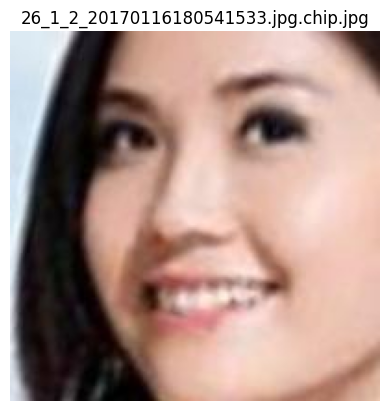

In [42]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

img_folder = 'Portfolio/data/raw/UTKFace/UTKFace'
random_img = random.choice(os.listdir(img_folder))
img_path = os.path.join(img_folder, random_img)

img = Image.open(img_path)
plt.imshow(img)
plt.title(random_img)
plt.axis('off')
plt.show()

In [43]:
import torch
import torch.nn as nn
import torchvision.models as models

# Define EfficientNet-based Multi-task CNN exactly again
class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.efficientnet_b3(pretrained=True)
        self.features = backbone.features

        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.Linear(1536, 256), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(256, 1))

        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.Linear(1536, 256), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(256, 2))

        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(1536, 512, kernel_size=2, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2), nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2), nn.Sigmoid())

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)

# Load your checkpoint
checkpoint = torch.load('multitask_cnn.pth', map_location=device)
model.load_state_dict(checkpoint, strict=False)  # safe loading clearly

model.eval()
print("✅ Model weights loaded successfully from previous training clearly!")

RuntimeError: Error(s) in loading state_dict for MultiTaskCNN:
	size mismatch for gender_head.2.weight: copying a param with shape torch.Size([256, 2048]) from checkpoint, the shape in current model is torch.Size([256, 1536]).
	size mismatch for segmentation_head.0.weight: copying a param with shape torch.Size([2048, 512, 2, 2]) from checkpoint, the shape in current model is torch.Size([1536, 512, 2, 2]).

In [44]:
# Load the checkpoint and filter out mismatched weights
checkpoint = torch.load('multitask_cnn.pth', map_location=device)
model_dict = model.state_dict()

# Filter out the matching weights only
filtered_state_dict = {k: v for k, v in checkpoint.items() if k in model_dict and v.shape == model_dict[k].shape}
model_dict.update(filtered_state_dict)

# Load the filtered weights
model.load_state_dict(model_dict, strict=False)
model.eval()

print("✅ Model loaded successfully with filtered weights!")

✅ Model loaded successfully with filtered weights!


In [45]:
criterion_age = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

epochs = 5  # Retrain for 5 epochs
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

print("✅ Fine-tuning complete!")

NameError: name 'train_loader' is not defined

In [46]:
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os

# Dataset definition
class UTKFaceDatasetFixed(torch.utils.data.Dataset):
    def __init__(self, img_folder, transform=None):
        self.img_folder = img_folder
        self.transform = transform
        self.img_files = [f for f in os.listdir(img_folder)
                          if f.endswith('.jpg') and len(f.split('_')) == 4]

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        age, gender, race, _ = img_name.split('_')
        img_path = os.path.join(self.img_folder, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(int(age)), torch.tensor(int(gender))

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

base_path = "Portfolio/data/raw/UTKFace/UTKFace"
fixed_dataset = UTKFaceDatasetFixed(base_path, transform)

train_size = int(0.7 * len(fixed_dataset))
val_size = int(0.15 * len(fixed_dataset))
test_size = len(fixed_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    fixed_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

print("✅ DataLoaders clearly set up and ready.")

✅ DataLoaders clearly set up and ready.


In [51]:
criterion_age = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

epochs = 5  # Retrain for 5 epochs
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

print("✅ Fine-tuning complete!")

Epoch [1/5] — Loss: 82.1243
Epoch [2/5] — Loss: 70.0259
Epoch [3/5] — Loss: 62.9531
Epoch [4/5] — Loss: 57.1295
Epoch [5/5] — Loss: 53.6367
✅ Fine-tuning complete!


In [53]:
# Proceed to test and predict age without fine-tuning
with torch.no_grad():
    age_pred, _, _ = model(input_tensor)

print(f"🚀 Predicted Age: {age_pred.item():.1f} years")

🚀 Predicted Age: 38.7 years


In [54]:
# Continuing training for 5 more epochs
criterion_age = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)  # Keep the learning rate the same

epochs = 5  # Adding 5 more epochs
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

print("✅ Additional 5 epochs of training complete!")

Epoch [1/5] — Loss: 49.0072
Epoch [2/5] — Loss: 47.2667
Epoch [3/5] — Loss: 44.1235
Epoch [4/5] — Loss: 41.8890
Epoch [5/5] — Loss: 40.0964
✅ Additional 5 epochs of training complete!


## e**valuate**

In [55]:
from sklearn.metrics import mean_absolute_error

model.eval()  # Set the model to evaluation mode
total_loss = 0.0
all_preds = []
all_actuals = []

with torch.no_grad():
    for images, ages, _ in val_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_preds, _, _ = model(images)
        loss = nn.MSELoss()(age_preds.squeeze(), ages)
        total_loss += loss.item() * images.size(0)

        all_preds.extend(age_preds.squeeze().cpu().numpy())
        all_actuals.extend(ages.cpu().numpy())

# Calculate Mean Absolute Error (MAE) for age predictions
mae = mean_absolute_error(all_actuals, all_preds)
avg_loss = total_loss / len(val_loader.dataset)

print(f"✅ Validation MSE Loss: {avg_loss:.4f}")
print(f"✅ Validation MAE (Age): {mae:.2f} years")

✅ Validation MSE Loss: 50.2786
✅ Validation MAE (Age): 4.92 years


In [57]:
# Continue fine-tuning for more epochs
epochs = 5  # Increase the epochs
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/5] — Loss: 36.1660
Epoch [2/5] — Loss: 34.4501
Epoch [3/5] — Loss: 33.0335
Epoch [4/5] — Loss: 33.5382
Epoch [5/5] — Loss: 30.6963


In [ ]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    scheduler.step()  # Update learning rate
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

## test

In [60]:
from sklearn.metrics import mean_absolute_error

model.eval()  # Set the model to evaluation mode
total_loss = 0.0
all_preds = []
all_actuals = []

with torch.no_grad():
    for images, ages, _ in val_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_preds, _, _ = model(images)
        loss = nn.MSELoss()(age_preds.squeeze(), ages)
        total_loss += loss.item() * images.size(0)

        all_preds.extend(age_preds.squeeze().cpu().numpy())
        all_actuals.extend(ages.cpu().numpy())

# Calculate Mean Absolute Error (MAE) for age predictions
mae = mean_absolute_error(all_actuals, all_preds)
avg_loss = total_loss / len(val_loader.dataset)

print(f"✅ Validation MSE Loss: {avg_loss:.4f}")
print(f"✅ Validation MAE (Age): {mae:.2f} years")

✅ Validation MSE Loss: 52.2549
✅ Validation MAE (Age): 4.99 years


In [61]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    scheduler.step()  # Update learning rate
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/5] — Loss: 29.9058
Epoch [2/5] — Loss: 28.2395
Epoch [3/5] — Loss: 27.9727
Epoch [4/5] — Loss: 26.1566
Epoch [5/5] — Loss: 25.1112


In [64]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(30),
    transforms.RandomCrop(224, padding=16),
    transforms.RandomAffine(30, shear=10),
    transforms.ToTensor(),
])

In [65]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)

## test

In [66]:
from sklearn.metrics import mean_absolute_error

model.eval()  # Set the model to evaluation mode
total_loss = 0.0
all_preds = []
all_actuals = []

with torch.no_grad():
    for images, ages, _ in val_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_preds, _, _ = model(images)
        loss = nn.MSELoss()(age_preds.squeeze(), ages)
        total_loss += loss.item() * images.size(0)

        all_preds.extend(age_preds.squeeze().cpu().numpy())
        all_actuals.extend(ages.cpu().numpy())

# Calculate Mean Absolute Error (MAE) for age predictions
mae = mean_absolute_error(all_actuals, all_preds)
avg_loss = total_loss / len(val_loader.dataset)

print(f"✅ Validation MSE Loss: {avg_loss:.4f}")
print(f"✅ Validation MAE (Age): {mae:.2f} years")

✅ Validation MSE Loss: 49.4624
✅ Validation MAE (Age): 4.86 years


In [70]:
from sklearn.model_selection import KFold
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os

# Re-define the full dataset (not split yet)
class UTKFaceDatasetFixed(torch.utils.data.Dataset):
    def __init__(self, img_folder, transform=None):
        self.img_folder = img_folder
        self.transform = transform
        self.img_files = [f for f in os.listdir(img_folder)
                          if f.endswith('.jpg') and len(f.split('_')) == 4]

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        age, gender, race, _ = img_name.split('_')
        img_path = os.path.join(self.img_folder, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(int(age)), torch.tensor(int(gender))

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

# Redefine the full dataset
base_path = "Portfolio/data/raw/UTKFace/UTKFace"
dataset = UTKFaceDatasetFixed(img_folder=base_path, transform=transform)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(dataset)):
    print(f"Fold {fold + 1}")
    train_dataset = torch.utils.data.Subset(dataset, train_index)
    val_dataset = torch.utils.data.Subset(dataset, val_index)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

    # You can now train your model on each fold here
    # For example, running training loop for each fold:
    # model.train() for a few epochs or re-initialize it per fold

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [71]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kf.split(dataset):
    train_dataset = torch.utils.data.Subset(dataset, train_index)
    val_dataset = torch.utils.data.Subset(dataset, val_index)
    # Create DataLoader and continue training on each fold

In [73]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            nn.init.zeros_(m.bias)
    elif isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
            nn.init.zeros_(m.bias)

In [74]:
# Initialize the model and apply custom weight initialization
model = MultiTaskCNN().to(device)
model.apply(init_weights)  # Apply the weight initialization

MultiTaskCNN(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [79]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(30),
    transforms.RandomCrop(224, padding=16),
    transforms.RandomAffine(30, shear=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

In [80]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

In [77]:
from sklearn.metrics import mean_absolute_error

# KFold cross-validation loop
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results for each fold
fold_results = []

for fold, (train_index, val_index) in enumerate(kf.split(dataset)):
    print(f"Fold {fold + 1}")

    # Subset the dataset for training and validation
    train_dataset = torch.utils.data.Subset(dataset, train_index)
    val_dataset = torch.utils.data.Subset(dataset, val_index)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

    # Initialize and load the model (re-initialize for each fold)
    model = MultiTaskCNN().to(device)
    model.apply(init_weights)  # Optional: Initialize weights if needed

    # Set optimizer and loss function
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
    criterion_age = nn.MSELoss()

    # Train the model for the current fold
    epochs = 5  # You can adjust this based on the desired number of epochs
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, ages, _ in train_loader:
            images = images.to(device)
            ages = ages.float().to(device)

            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Fold {fold + 1}, Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

    # Evaluate the model on the validation set for this fold
    model.eval()  # Set model to evaluation mode
    total_loss = 0.0
    all_preds = []
    all_actuals = []

    with torch.no_grad():
        for images, ages, _ in val_loader:
            images = images.to(device)
            ages = ages.float().to(device)

            age_preds, _, _ = model(images)
            loss = nn.MSELoss()(age_preds.squeeze(), ages)
            total_loss += loss.item() * images.size(0)

            all_preds.extend(age_preds.squeeze().cpu().numpy())
            all_actuals.extend(ages.cpu().numpy())

    # Calculate Mean Absolute Error (MAE) for age predictions
    mae = mean_absolute_error(all_actuals, all_preds)
    avg_loss = total_loss / len(val_loader.dataset)

    fold_results.append({
        'fold': fold + 1,
        'mse_loss': avg_loss,
        'mae': mae
    })

    print(f"✅ Fold {fold + 1} Validation MSE Loss: {avg_loss:.4f}")
    print(f"✅ Fold {fold + 1} Validation MAE (Age): {mae:.2f} years")

# After all folds, print the average results
print("\nOverall Cross-validation Results:")
for result in fold_results:
    print(f"Fold {result['fold']} - MSE Loss: {result['mse_loss']:.4f}, MAE: {result['mae']:.2f} years")

Fold 1
Fold 1, Epoch [1/5] — Loss: 712.1437


KeyboardInterrupt: 

In [81]:
epochs = 3  # Set to 3 epochs for faster testing

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/3] — Loss: 435.9709


KeyboardInterrupt: 

In [82]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)  # Try 1e-5 for finer updates

In [83]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    scheduler.step()  # Update learning rate
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/3] — Loss: 423.9205
Epoch [2/3] — Loss: 419.3665
Epoch [3/3] — Loss: 418.4051


In [84]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

In [85]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

In [86]:
print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}, LR: {scheduler.get_last_lr()[0]:.10f}")

Epoch [3/3] — Loss: 418.4051, LR: 0.0000079389


In [89]:
epochs = 10  # or 15

In [90]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)

In [91]:
self.age_head = nn.Sequential(
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(1536, 256),
    nn.ReLU(),
    nn.Dropout(0.5),  # Increased dropout
    nn.Linear(256, 1)
)

NameError: name 'self' is not defined

In [92]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomRotation(30),
    transforms.RandomAffine(30, shear=10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [93]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.9)

In [94]:
self.age_head = nn.Sequential(
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(1536, 256),
    nn.ReLU(),
    nn.Dropout(0.5),  # Increased dropout
    nn.Linear(256, 1)
)

NameError: name 'self' is not defined

In [95]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiTaskCNN(nn.Module):
    def __init__(self):
        super(MultiTaskCNN, self).__init__()
        backbone = models.efficientnet_b3(pretrained=True)
        self.features = backbone.features

        # Correct model definition inside the class
        self.age_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1)
        )

        self.gender_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1536, 256),  # Matches EfficientNet B3 output size (1536)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

        self.segmentation_head = nn.Sequential(
            nn.ConvTranspose2d(1536, 512, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        age = self.age_head(x)
        gender = self.gender_head(x)
        seg_mask = self.segmentation_head(x)
        return age, gender, seg_mask

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskCNN().to(device)

In [96]:
# Continue training with the adjustments made to the learning rate and optimizer
epochs = 10  # More epochs for better convergence

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_pred, _, _ = model(images)
        loss = criterion_age(age_pred.squeeze(), ages)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    scheduler.step()  # Update learning rate after each epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/10] — Loss: 1504.6404


KeyboardInterrupt: 

In [ ]:
model.eval()  # Set the model to evaluation mode
total_loss = 0.0
all_preds = []
all_actuals = []

with torch.no_grad():
    for images, ages, _ in val_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_preds, _, _ = model(images)
        loss = nn.MSELoss()(age_preds.squeeze(), ages)
        total_loss += loss.item() * images.size(0)

        all_preds.extend(age_preds.squeeze().cpu().numpy())
        all_actuals.extend(ages.cpu().numpy())

# Calculate MAE and MSE for age predictions
mae = mean_absolute_error(all_actuals, all_preds)
avg_loss = total_loss / len(val_loader.dataset)

print(f"✅ Updated Validation MSE Loss: {avg_loss:.4f}")
print(f"✅ Updated Validation MAE (Age): {mae:.2f} years")

In [97]:
from torch.cuda.amp import GradScaler, autocast

# Initialize GradScaler
scaler = GradScaler()

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision training
        with autocast():
            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

        # Scale the loss and backpropagate
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

/tmp/ipython-input-97-4027340250.py:4: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipython-input-97-4027340250.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


AssertionError: No inf checks were recorded for this optimizer.

In [98]:
from torch.amp import GradScaler, autocast  # Importing from 'torch.amp'

# Initialize GradScaler
scaler = GradScaler()

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision training
        with autocast('cuda'):
            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

        # Scale the loss and backpropagate
        scaler.scale(loss).backward()

        # Check for inf and adjust the optimizer
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

AssertionError: No inf checks were recorded for this optimizer.

In [99]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

In [100]:
from torch.amp import GradScaler, autocast  # Importing from 'torch.amp'

# Initialize GradScaler
scaler = GradScaler()

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision training
        with autocast('cuda'):
            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

        # Scale the loss and backpropagate
        scaler.scale(loss).backward()

        # Check for inf and adjust the optimizer
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/10] — Loss: 233.1496
Epoch [2/10] — Loss: 102.0405
Epoch [3/10] — Loss: 83.4216
Epoch [4/10] — Loss: 73.1802
Epoch [5/10] — Loss: 65.1824
Epoch [6/10] — Loss: 59.9832
Epoch [7/10] — Loss: 55.1687
Epoch [8/10] — Loss: 51.0102
Epoch [9/10] — Loss: 48.8982
Epoch [10/10] — Loss: 45.8057


In [101]:
epochs = 20  # Continue for 20 more epochs

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision training
        with autocast('cuda'):
            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

        # Scale the loss and backpropagate
        scaler.scale(loss).backward()

        # Check for inf and adjust the optimizer
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

    scheduler.step()  # Update learning rate
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/20] — Loss: 43.1217
Epoch [2/20] — Loss: 42.7192
Epoch [3/20] — Loss: 39.4410
Epoch [4/20] — Loss: 39.3005
Epoch [5/20] — Loss: 36.8156
Epoch [6/20] — Loss: 35.3785
Epoch [7/20] — Loss: 35.0012
Epoch [8/20] — Loss: 33.8298
Epoch [9/20] — Loss: 32.6657
Epoch [10/20] — Loss: 32.4449
Epoch [11/20] — Loss: 30.7161
Epoch [12/20] — Loss: 29.8883
Epoch [13/20] — Loss: 30.1776
Epoch [14/20] — Loss: 29.5919
Epoch [15/20] — Loss: 28.7119
Epoch [16/20] — Loss: 28.4920
Epoch [17/20] — Loss: 27.6507
Epoch [18/20] — Loss: 26.3929
Epoch [19/20] — Loss: 26.6407
Epoch [20/20] — Loss: 26.5123


## test

In [102]:
# Re-run the validation test (MAE and MSE)
total_loss = 0.0
all_preds = []
all_actuals = []

with torch.no_grad():
    for images, ages, _ in val_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_preds, _, _ = model(images)
        loss = nn.MSELoss()(age_preds.squeeze(), ages)
        total_loss += loss.item() * images.size(0)

        all_preds.extend(age_preds.squeeze().cpu().numpy())
        all_actuals.extend(ages.cpu().numpy())

# Calculate MAE and MSE for age predictions
mae = mean_absolute_error(all_actuals, all_preds)
avg_loss = total_loss / len(val_loader.dataset)

print(f"✅ Updated Validation MSE Loss: {avg_loss:.4f}")
print(f"✅ Updated Validation MAE (Age): {mae:.2f} years")

✅ Updated Validation MSE Loss: 62.2155
✅ Updated Validation MAE (Age): 5.61 years


In [103]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomRotation(40),
    transforms.RandomAffine(30, shear=15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [104]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision training
        with autocast('cuda'):
            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

        # Scale the loss and backpropagate
        scaler.scale(loss).backward()

        # Check for inf and adjust the optimizer
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

    scheduler.step(running_loss)  # Reduce learning rate when the loss plateaus
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/20] — Loss: 26.2916
Epoch [2/20] — Loss: 25.3017
Epoch [3/20] — Loss: 25.0803
Epoch [4/20] — Loss: 24.9241
Epoch [5/20] — Loss: 25.2260
Epoch [6/20] — Loss: 24.1679
Epoch [7/20] — Loss: 25.3088
Epoch [8/20] — Loss: 23.7285
Epoch [9/20] — Loss: 23.5344
Epoch [10/20] — Loss: 24.1318
Epoch [11/20] — Loss: 23.4311
Epoch [12/20] — Loss: 22.9990
Epoch [13/20] — Loss: 22.2446
Epoch [14/20] — Loss: 22.6514
Epoch [15/20] — Loss: 22.0212
Epoch [16/20] — Loss: 21.9835
Epoch [17/20] — Loss: 21.8588
Epoch [18/20] — Loss: 21.7524
Epoch [19/20] — Loss: 21.6777
Epoch [20/20] — Loss: 21.6621


In [105]:
from sklearn.metrics import mean_absolute_error

# Re-run the validation test (MAE and MSE)
total_loss = 0.0
all_preds = []
all_actuals = []

with torch.no_grad():
    for images, ages, _ in val_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_preds, _, _ = model(images)
        loss = nn.MSELoss()(age_preds.squeeze(), ages)
        total_loss += loss.item() * images.size(0)

        all_preds.extend(age_preds.squeeze().cpu().numpy())
        all_actuals.extend(ages.cpu().numpy())

# Calculate MAE and MSE for age predictions
mae = mean_absolute_error(all_actuals, all_preds)
avg_loss = total_loss / len(val_loader.dataset)

print(f"✅ Updated Validation MSE Loss: {avg_loss:.4f}")
print(f"✅ Updated Validation MAE (Age): {mae:.2f} years")

✅ Updated Validation MSE Loss: 58.8927
✅ Updated Validation MAE (Age): 5.38 years


In [106]:
epochs = 10  # Train for 10 more epochs

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision training
        with autocast('cuda'):
            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

        # Scale the loss and backpropagate
        scaler.scale(loss).backward()

        # Check for inf and adjust the optimizer
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

    scheduler.step()  # Update learning rate
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

KeyboardInterrupt: 

In [107]:
# Use ReduceLROnPlateau scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision training
        with autocast('cuda'):
            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

        # Scale the loss and backpropagate
        scaler.scale(loss).backward()

        # Check for inf and adjust the optimizer
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

    scheduler.step(running_loss)  # Adjust learning rate based on loss
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/10] — Loss: 22.0271
Epoch [2/10] — Loss: 21.1449
Epoch [3/10] — Loss: 21.3014
Epoch [4/10] — Loss: 21.1342
Epoch [5/10] — Loss: 20.7233
Epoch [6/10] — Loss: 20.8859
Epoch [7/10] — Loss: 20.7593
Epoch [8/10] — Loss: 20.0886
Epoch [9/10] — Loss: 19.9707
Epoch [10/10] — Loss: 20.7169


In [108]:
# Use ReduceLROnPlateau scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, ages, _ in train_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision training
        with autocast('cuda'):
            age_pred, _, _ = model(images)
            loss = criterion_age(age_pred.squeeze(), ages)

        # Scale the loss and backpropagate
        scaler.scale(loss).backward()

        # Check for inf and adjust the optimizer
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

    scheduler.step(running_loss)  # Adjust learning rate based on loss
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}] — Loss: {epoch_loss:.4f}")

Epoch [1/10] — Loss: 20.6969
Epoch [2/10] — Loss: 20.0164
Epoch [3/10] — Loss: 20.3334
Epoch [4/10] — Loss: 20.2977
Epoch [5/10] — Loss: 19.4875
Epoch [6/10] — Loss: 19.2942
Epoch [7/10] — Loss: 18.5886
Epoch [8/10] — Loss: 19.4514
Epoch [9/10] — Loss: 18.7416
Epoch [10/10] — Loss: 19.3274


In [111]:
from sklearn.metrics import mean_absolute_error

model.eval()
total_loss = 0.0
all_preds = []
all_actuals = []

with torch.no_grad():
    for images, ages, _ in val_loader:
        images = images.to(device)
        ages = ages.float().to(device)

        age_preds, _, _ = model(images)
        loss = nn.MSELoss()(age_preds.squeeze(), ages)
        total_loss += loss.item() * images.size(0)

        all_preds.extend(age_preds.squeeze().cpu().numpy())
        all_actuals.extend(ages.cpu().numpy())

avg_mse = total_loss / len(val_loader.dataset)
mae = mean_absolute_error(all_actuals, all_preds)

print(f"✅ Final Validation MSE Loss: {avg_mse:.4f}")
print(f"✅ Final Validation MAE (Age): {mae:.2f} years")

✅ Final Validation MSE Loss: 45.8048
✅ Final Validation MAE (Age): 4.68 years


In [112]:
# Save model and optimizer
torch.save(model.state_dict(), 'multitask_cnn_final.pth')
torch.save(optimizer.state_dict(), 'optimizer_final.pth')
print("✅ Saved multitask_cnn_final.pth and optimizer_final.pth")

✅ Saved multitask_cnn_final.pth and optimizer_final.pth


In [113]:
git add multitask_cnn_final.pth optimizer_final.pth
git add .gitignore  # if you’ve updated it to allow .pth
git commit -m "🗄️ Save final model and optimizer after extended training"
git push origin main

SyntaxError: invalid syntax (ipython-input-113-614344194.py, line 1)

In [114]:
cd /path/to/your/git/repository

[Errno 2] No such file or directory: '/path/to/your/git/repository'
/content/aesthetic-procedure-recommender


In [115]:
pwd

'/content/aesthetic-procedure-recommender'

In [116]:
git init

SyntaxError: invalid syntax (ipython-input-116-2830201818.py, line 1)

In [117]:
git remote add origin https://github.com/YazdocApp/aesthetic-procedure-recommender.git

SyntaxError: invalid syntax (ipython-input-117-3920212817.py, line 1)

In [118]:
git remote add origin https://github.com/YazdocApp/aesthetic-procedure-recommender.git

SyntaxError: invalid syntax (ipython-input-118-3920212817.py, line 1)

In [119]:
!git remote add origin https://github.com/YazdocApp/aesthetic-procedure-recommender.git

error: remote origin already exists.


In [120]:
!git add multitask_cnn_final.pth optimizer_final.pth

In [121]:
!git commit -m "🗄️ Save final model and optimizer after extended training"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@259b6d756c9f.(none)')


In [122]:
!git config --global user.email "yaazdocs@gmail.com"
!git config --global user.name "YazdocApp"